In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/mhealth_resampled_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,-8.4230,-6.6402,2.98050,-0.93922,0.090349,0.219830,0,subject1
1,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,-1.09820,2.2046,-7.5497,4.02880,-0.21961,-1.080100,0.303880,0,subject8
2,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,-2.5898,-8.5217,3.83430,-0.88431,-0.848050,0.331900,0,subject2
3,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,-0.78389,-1.0049,-6.8588,2.11540,-0.35686,-0.854210,-0.415950,0,subject4
4,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-1.4178,-9.5157,1.43050,-0.12353,-0.967150,-0.497840,0,subject3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373190,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-8.2348,-4.9652,2.48090,-0.43725,-1.018500,0.079741,12,subject10
373191,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-21.3180,-10.2130,3.65600,-0.43725,-1.018500,0.079741,12,subject10
373192,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-21.2970,-18.7050,4.46060,-0.43725,-1.018500,0.079741,12,subject10
373193,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,-21.1380,-18.6980,1.15880,-0.42549,-1.037000,0.084052,12,subject10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373195 entries, 0 to 373194
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373195 non-null  float64
 1   aly       373195 non-null  float64
 2   alz       373195 non-null  float64
 3   glx       373195 non-null  float64
 4   gly       373195 non-null  float64
 5   glz       373195 non-null  float64
 6   arx       373195 non-null  float64
 7   ary       373195 non-null  float64
 8   arz       373195 non-null  float64
 9   grx       373195 non-null  float64
 10  gry       373195 non-null  float64
 11  grz       373195 non-null  float64
 12  Activity  373195 non-null  int64  
 13  subject   373195 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 39.9+ MB


In [ ]:
# df.isnull().sum()
# print(df[df.duplicated(keep='first')])
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [ ]:
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)

In [ ]:
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     29540
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [ ]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

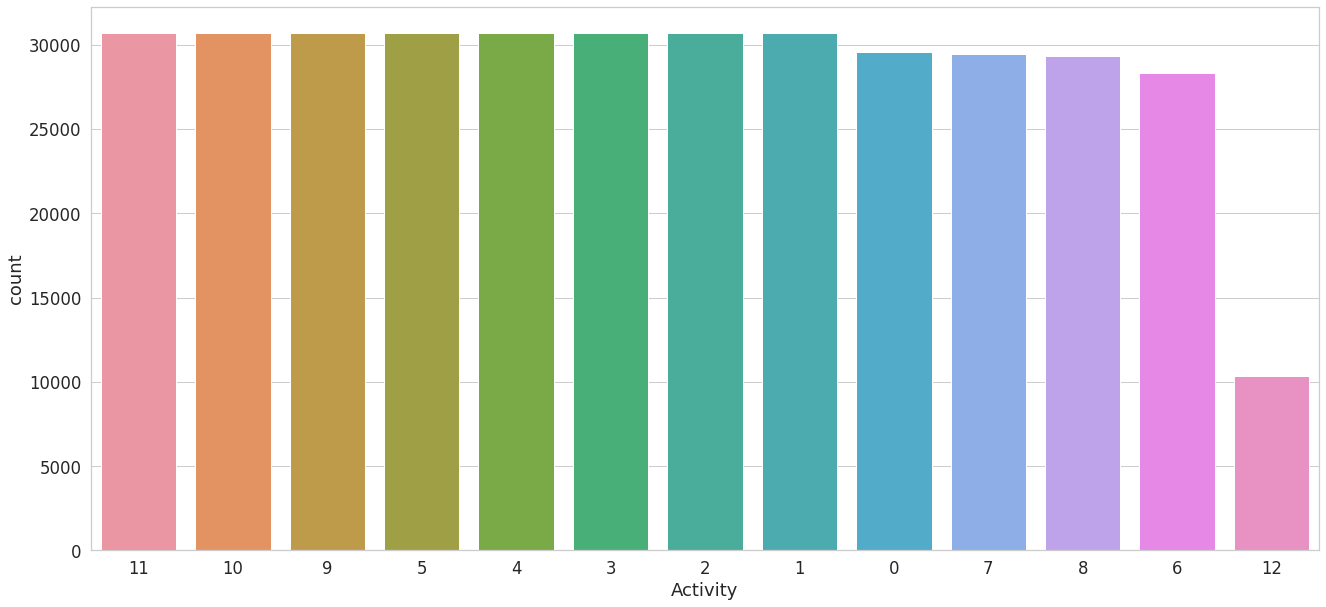

In [ ]:
sns.countplot(x = 'Activity',
              data = df,
              order = df.Activity.value_counts().index);

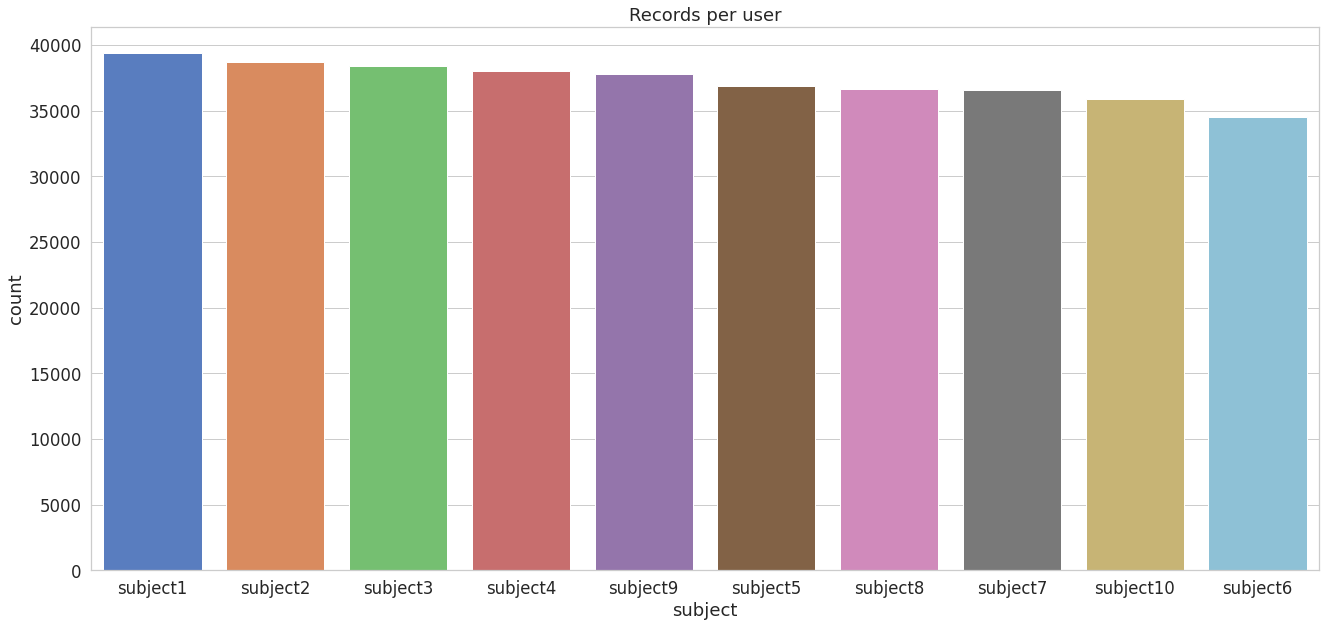

In [ ]:
sns.countplot(x = 'subject',
              data = df,
              
              order = df.subject.value_counts().index);
plt.title("Records per user");

In [ ]:
subject1 = df[df['subject']=='subject1']
subject1.Activity.value_counts()

0     4243
8     3379
11    3072
10    3072
9     3072
7     3072
6     3072
5     3072
4     3072
3     3072
2     3072
1     3072
12    1075
Name: Activity, dtype: int64

In [ ]:
df1 = df.copy()

In [ ]:
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((299093, 14), (73642, 14))

In [ ]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((299093, 12), (299093,), (73642, 12), (73642,))

In [ ]:
from scipy import stats
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [ ]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_train.shape, y_train.shape

((5980, 100, 12), (5980, 1))

In [ ]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
X_test.shape, y_test.shape

((1471, 100, 12), (1471, 1))

In [ ]:
print(X_train.shape, y_train.shape)

(5980, 100, 12) (5980, 1)


In [ ]:
from keras import layers
import tensorflow as tf
import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=128, 
          input_shape=[X_train.shape[1], X_train.shape[2]]
      )
    )
)
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(13, activation='softmax'))

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(X_train,y_train, epochs= 10, validation_data=(X_test,y_test))

Epoch 1/10
187/187 [==============================] - 35s 163ms/step - loss: 1.3304 - sparse_categorical_accuracy: 0.5581 - val_loss: 0.2913 - val_sparse_categorical_accuracy: 0.8987
Epoch 2/10
187/187 [==============================] - 29s 156ms/step - loss: 0.2604 - sparse_categorical_accuracy: 0.9150 - val_loss: 0.1468 - val_sparse_categorical_accuracy: 0.9606
Epoch 3/10
187/187 [==============================] - 30s 158ms/step - loss: 0.1574 - sparse_categorical_accuracy: 0.9469 - val_loss: 0.1746 - val_sparse_categorical_accuracy: 0.9524
Epoch 4/10
187/187 [==============================] - 29s 157ms/step - loss: 0.1044 - sparse_categorical_accuracy: 0.9700 - val_loss: 0.2227 - val_sparse_categorical_accuracy: 0.9293
Epoch 5/10
187/187 [==============================] - 30s 158ms/step - loss: 0.0953 - sparse_categorical_accuracy: 0.9660 - val_loss: 0.2094 - val_sparse_categorical_accuracy: 0.9538
Epoch 6/10
187/187 [==============================] - 29s 157ms/step - loss: 0.0520 -

In [ ]:
model_history.history

{'loss': [0.7944377660751343,
  0.22658732533454895,
  0.14674882590770721,
  0.10640240460634232,
  0.08172249048948288,
  0.051820944994688034,
  0.08059124648571014,
  0.13190291821956635,
  0.04943891987204552,
  0.05035647749900818],
 'sparse_categorical_accuracy': [0.7200669050216675,
  0.9237458109855652,
  0.9498327970504761,
  0.9685618877410889,
  0.972909688949585,
  0.9851170778274536,
  0.9747491478919983,
  0.9613712430000305,
  0.9856187105178833,
  0.9872909784317017],
 'val_loss': [0.29125839471817017,
  0.14683131873607635,
  0.17464739084243774,
  0.222722589969635,
  0.20940959453582764,
  0.2077934890985489,
  0.26524707674980164,
  0.12766487896442413,
  0.30070680379867554,
  0.17535121738910675],
 'val_sparse_categorical_accuracy': [0.8987083435058594,
  0.9605710506439209,
  0.9524133205413818,
  0.9292997717857361,
  0.9537729620933533,
  0.9564921855926514,
  0.9524133205413818,
  0.9626104831695557,
  0.9150238037109375,
  0.9598912596702576]}

In [ ]:
train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

46/46 [==============================] - 2s 36ms/step - loss: 0.1754 - sparse_categorical_accuracy: 0.9599
Train accuracy 99.23 %
Train loss 0.0296159777790308
Test accuracy 95.99 %
Test loss 0.17535121738910675


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       0.98      0.98      0.98       123
           2       0.98      0.99      0.98       123
           3       1.00      0.98      0.99       123
           4       0.99      1.00      1.00       123
           5       0.81      1.00      0.90       123
           6       0.84      0.96      0.90       107
           7       0.98      0.99      0.99       112
           8       1.00      0.60      0.75       117
           9       0.99      1.00      1.00       123
          10       1.00      1.00      1.00       122
          11       1.00      1.00      1.00       124
          12       1.00      1.00      1.00        40

    accuracy                           0.96      1471
   macro avg       0.97      0.96      0.96      1471
weighted avg       0.97      0.96      0.96      1471

**************************************************
[[111   0   0   0   0   0   

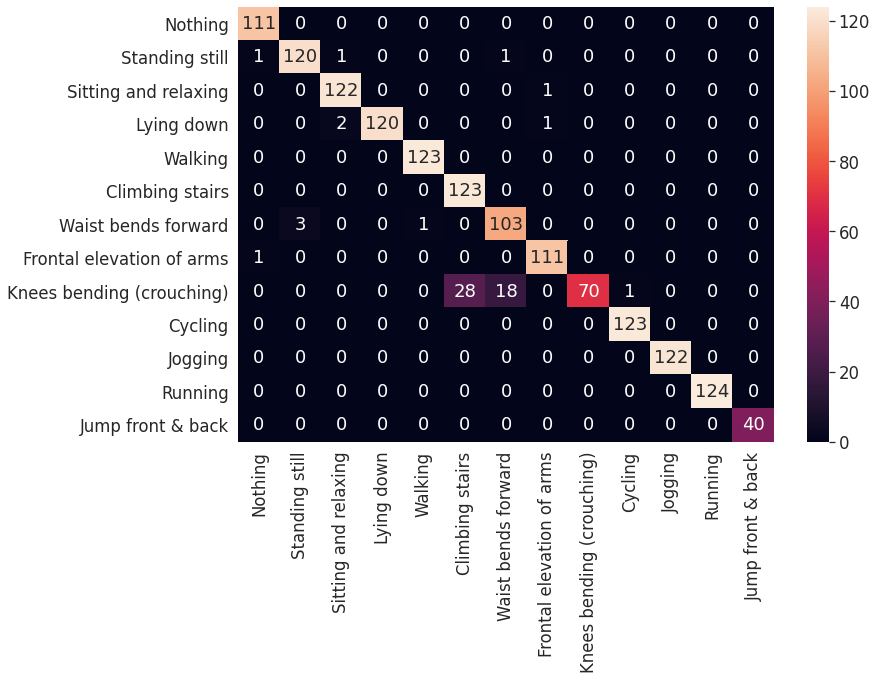

In [ ]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()